In [2]:
!pip3 install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl 

torch-0.4.1-{platform}-linux_x86_64.whl is not a valid wheel filename.


In [3]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip3 install torchtext
!pip3 install torchvision

tcmalloc: large alloc 1073750016 bytes == 0x5808e000 @  0x7fe423ac62a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 71kB 2.7MB/s 


In [0]:
import os
import torch
import torchvision
from torchvision.datasets.utils import download_url
import zipfile

train_path = 'train'
dl_file = 'dl2018-image-proj.zip'
dl_url = 'https://users.aalto.fi/mvsjober/misc/'

zip_path = os.path.join(train_path, dl_file)
if not os.path.isfile(zip_path):
    download_url(dl_url + dl_file, root=train_path, filename=dl_file, md5=None)

with zipfile.ZipFile(zip_path) as zip_f:
    zip_f.extractall(train_path)
    
    #os.unlink(zip_path)

In [0]:
# to make PIL works
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

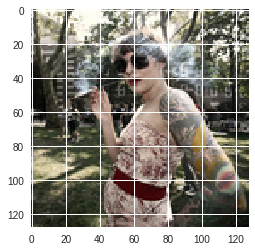

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('train/images/im1.jpg')

plt.imshow(img);

In [40]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('train/images/') if isfile(join('train/images/', f))]

print(onlyfiles)

os.path.abspath("train/images/im1.jpg")

['im14952.jpg', 'im14059.jpg', 'im4581.jpg', 'im217.jpg', 'im18205.jpg', 'im5767.jpg', 'im2854.jpg', 'im10391.jpg', 'im13254.jpg', 'im1162.jpg', 'im13704.jpg', 'im9980.jpg', 'im14490.jpg', 'im8045.jpg', 'im19068.jpg', 'im7814.jpg', 'im17937.jpg', 'im8959.jpg', 'im12198.jpg', 'im17705.jpg', 'im12027.jpg', 'im8985.jpg', 'im16245.jpg', 'im15671.jpg', 'im6300.jpg', 'im10095.jpg', 'im14241.jpg', 'im15425.jpg', 'im5720.jpg', 'im422.jpg', 'im9702.jpg', 'im8158.jpg', 'im9789.jpg', 'im16563.jpg', 'im2989.jpg', 'im15885.jpg', 'im10255.jpg', 'im18433.jpg', 'im17382.jpg', 'im8369.jpg', 'im7067.jpg', 'im1562.jpg', 'im4208.jpg', 'im403.jpg', 'im2826.jpg', 'im2622.jpg', 'im13887.jpg', 'im511.jpg', 'im8410.jpg', 'im13741.jpg', 'im5398.jpg', 'im5979.jpg', 'im5199.jpg', 'im1801.jpg', 'im6209.jpg', 'im16817.jpg', 'im15146.jpg', 'im15382.jpg', 'im9430.jpg', 'im13479.jpg', 'im5869.jpg', 'im6085.jpg', 'im10667.jpg', 'im7957.jpg', 'im18908.jpg', 'im1780.jpg', 'im8518.jpg', 'im17666.jpg', 'im15839.jpg', 'im12

'/content/train/images/im1.jpg'

In [0]:
cp -a /source/. /dest/

In [0]:
def load_dataset():
    data_path = os.path.join('train')
    train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.ToTensor()
    )
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=64,
        num_workers=0,
        shuffle=True
    )
    return train_loader

In [0]:
train_loader = load_dataset()

In [92]:
for X_train, y_train in train_loader:
  print(X_train)
  print(y_train)
  break

tensor([[[[0.1255, 0.0902, 0.0706,  ..., 0.7098, 0.4549, 0.3608],
          [0.1804, 0.1490, 0.1098,  ..., 0.7059, 0.5647, 0.6275],
          [0.1333, 0.1333, 0.1725,  ..., 0.5333, 0.5490, 0.6039],
          ...,
          [0.0627, 0.0039, 0.0471,  ..., 0.9373, 0.6863, 0.6353],
          [0.3686, 0.1255, 0.0000,  ..., 0.9412, 0.7451, 0.6275],
          [0.8392, 0.7255, 0.2863,  ..., 0.9373, 0.8000, 0.6196]],

         [[0.1922, 0.1412, 0.1020,  ..., 0.7176, 0.4392, 0.3294],
          [0.1804, 0.1804, 0.1569,  ..., 0.6824, 0.5255, 0.5765],
          [0.1647, 0.1765, 0.1451,  ..., 0.4314, 0.4863, 0.5412],
          ...,
          [0.0784, 0.0314, 0.0941,  ..., 0.9451, 0.7608, 0.7451],
          [0.3137, 0.1176, 0.0706,  ..., 0.9412, 0.8039, 0.7373],
          [0.6667, 0.5804, 0.2431,  ..., 0.9373, 0.8549, 0.7294]],

         [[0.1686, 0.1059, 0.0588,  ..., 0.7059, 0.3255, 0.1843],
          [0.1412, 0.1294, 0.1098,  ..., 0.6902, 0.4863, 0.4510],
          [0.0824, 0.1098, 0.1059,  ..., 0

torch.Size([3, 128, 128])
(128, 128, 3)


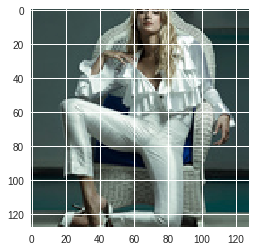

In [84]:
print(batch[0][0].shape)

# example of tensor: batch[0][63]
def plot_image(tensor):

  x = tensor.permute(1,2,0).data.numpy()

  plt.imshow(x);

In [89]:
print(batch[1])

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
